# Exploração dados COVID-19 em Portugal

## Instala as coisas necessárias para correr no Google Colab

In [5]:
!lsb_release -a

No LSB modules are available.
Distributor ID:	Ubuntu
Description:	Ubuntu 18.04.3 LTS
Release:	18.04
Codename:	bionic


In [6]:
adicionado = False

with open('/etc/apt/sources.list') as f:
    if 'https://qgis.org/ubuntu' in f.read():
        print("Repositório já estava adicionado")
        adicionado = True

if adicionado == False:
    # Adiciona Repositório
    !echo "deb     https://qgis.org/ubuntu bionic main" >> /etc/apt/sources.list
    !echo "deb-src https://qgis.org/ubuntu bionic main" >> /etc/apt/sources.list

    # Adiciona chave pública ao apt keyring
    !wget -O - https://qgis.org/downloads/qgis-2019.gpg.key | apt-key add
    
    print("Repositório do qgis adicionado com sucesso!")

--2020-04-29 15:08:40--  https://qgis.org/downloads/qgis-2019.gpg.key
Resolving qgis.org (qgis.org)... 104.27.139.220, 104.27.138.220, 2606:4700:3035::681b:8adc, ...
Connecting to qgis.org (qgis.org)|104.27.139.220|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1839 (1.8K) [application/pgp-keys]
Saving to: ‘STDOUT’

-                   100%[===================>]   1.80K  --.-KB/s    in 0s      

2020-04-29 15:08:42 (37.5 MB/s) - written to stdout [1839/1839]

OK
Repositório do qgis adicionado com sucesso!


In [0]:
# Instala qgis
!apt update
!apt install qgis qgis-plugin-grass

# qgis-plugin-grass não deve ser preciso instalar mas pronto

In [8]:
!apt-cache policy qgis

qgis:
  Installed: 1:3.12.2+28bionic
  Candidate: 1:3.12.2+28bionic
  Version table:
 *** 1:3.12.2+28bionic 500
        500 https://qgis.org/ubuntu bionic/main amd64 Packages
        100 /var/lib/dpkg/status
     2.18.17+dfsg-1 500
        500 http://archive.ubuntu.com/ubuntu bionic/universe amd64 Packages


In [9]:
# A versão do IPython que o google collab tem é antiga
# e não estava a dar para imprimir o mapa

# É necessário reiniciar o runtime depois de atualizar IPython
!pip install IPython --upgrade

     |████████████████████████████████| 788kB 2.7MB/s 
     |████████████████████████████████| 358kB 14.5MB/s 
ERROR: jupyter-console 5.2.0 has requirement prompt-toolkit<2.0.0,>=1.0.0, but you'll have prompt-toolkit 3.0.5 which is incompatible.
ERROR: google-colab 1.0.0 has requirement ipython~=5.5.0, but you'll have ipython 7.13.0 which is incompatible.
  Found existing installation: prompt-toolkit 1.0.18
    Uninstalling prompt-toolkit-1.0.18:
      Successfully uninstalled prompt-toolkit-1.0.18
  Found existing installation: ipython 5.5.0
    Uninstalling ipython-5.5.0:
      Successfully uninstalled ipython-5.5.0


## Início do código

In [10]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/jgrocha/covid-pt/master/situacao_epidemiologica.csv")
df.head()

,id,url,data_relatorio,suspeitos,confirmados,nao_confirmados,aguarda_resultados,recuperados,obitos,em_vigilancia,confirmados_masculino_0_9,confirmados_masculino_10_19,confirmados_masculino_20_29,confirmados_masculino_30_39,confirmados_masculino_40_49,confirmados_masculino_50_59,confirmados_masculino_60_69,confirmados_masculino_70_79,confirmados_masculino_80_sup,confirmados_feminino_0_9,confirmados_feminino_10_19,confirmados_feminino_20_29,confirmados_feminino_30_39,confirmados_feminino_40_49,confirmados_feminino_50_59,confirmados_feminino_60_69,confirmados_feminino_70_79,confirmados_feminino_80_sup,importados,internados,internados_uci,sintoma_febre,sintoma_tosse,sintoma_respiratoria,sintoma_cefaleia,sintoma_dores,sintoma_fraqueza,obitos_masculino_0_9,obitos_masculino_10_19,obitos_masculino_20_29,obitos_masculino_30_39,obitos_masculino_40_49,obitos_masculino_50_59,obitos_masculino_60_69,obitos_masculino_70_79,obitos_masculino_80_sup,obitos_feminino_0_9,obitos_feminino_10_19,obitos_feminino_20_29,obitos_feminino_30_39,obitos_feminino_40_49,obitos_feminino_50_59,obitos_feminino_60_69,obitos_feminino_70_79,obitos_feminino_80_sup
0,5,https://covid19.min-saude.pt/wp-content/upload...,2020-03-07,224,21,NaN,47.0,NaN,0,412.0,NaN,2.0,1.0,2.0,6.0,2.0,2.0,0.0,NaN,NaN,1.0,0.0,1.0,2.0,0.0,1.0,1.0,NaN,5.0,21.0,NaN,13,15,3.0,9,10,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6,https://covid19.min-saude.pt/wp-content/upload...,2020-03-08,281,30,NaN,56.0,NaN,0,447.0,NaN,2.0,1.0,3.0,6.0,3.0,3.0,0.0,NaN,NaN,3.0,1.0,1.0,4.0,0.0,1.0,2.0,NaN,6.0,30.0,NaN,18,23,5.0,14,17,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8,https://covid19.min-saude.pt/wp-content/upload...,2020-03-10,375,41,NaN,83.0,NaN,0,667.0,NaN,3.0,1.0,4.0,7.0,3.0,5.0,0.0,NaN,NaN,3.0,1.0,2.0,7.0,1.0,1.0,3.0,NaN,8.0,40.0,NaN,23,29,6.0,19,21,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11,https://covid19.min-saude.pt/wp-content/upload...,2020-03-13,1308,112,NaN,172.0,NaN,0,5674.0,1.0,5.0,8.0,15.0,14.0,12.0,8.0,3.0,2.0,0.0,10.0,3.0,9.0,14.0,2.0,3.0,3.0,0.0,33.0,107.0,NaN,48,65,12.0,39,37,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,12,https://covid19.min-saude.pt/wp-content/upload...,2020-03-14,1704,169,NaN,126.0,1.0,0,5011.0,1.0,6.0,12.0,20.0,22.0,21.0,9.0,7.0,2.0,0.0,13.0,7.0,17.0,19.0,5.0,3.0,4.0,1.0,39.0,114.0,10.0,39,54,10.0,33,34,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
#imprime todas as variáveis
list(df.columns.values)

['id',
 'url',
 'data_relatorio',
 'suspeitos',
 'confirmados',
 'nao_confirmados',
 'aguarda_resultados',
 'recuperados',
 'obitos',
 'em_vigilancia',
 'confirmados_masculino_0_9',
 'confirmados_masculino_10_19',
 'confirmados_masculino_20_29',
 'confirmados_masculino_30_39',
 'confirmados_masculino_40_49',
 'confirmados_masculino_50_59',
 'confirmados_masculino_60_69',
 'confirmados_masculino_70_79',
 'confirmados_masculino_80_sup',
 'confirmados_feminino_0_9',
 'confirmados_feminino_10_19',
 'confirmados_feminino_20_29',
 'confirmados_feminino_30_39',
 'confirmados_feminino_40_49',
 'confirmados_feminino_50_59',
 'confirmados_feminino_60_69',
 'confirmados_feminino_70_79',
 'confirmados_feminino_80_sup',
 'importados',
 'internados',
 'internados_uci',
 'sintoma_febre',
 'sintoma_tosse',
 'sintoma_respiratoria',
 'sintoma_cefaleia',
 'sintoma_dores',
 'sintoma_fraqueza',
 'obitos_masculino_0_9',
 'obitos_masculino_10_19',
 'obitos_masculino_20_29',
 'obitos_masculino_30_39',
 'obito

# **Gráficos sobre os dados do COVID-19 em Portugal**

### Evolução do número de casos confirmados de COVID-19 em Portugal

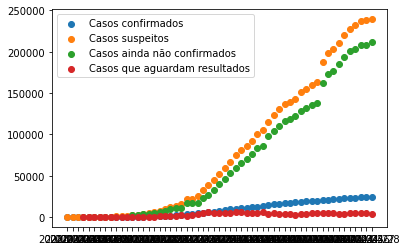

In [12]:
import matplotlib.pyplot as plt

sorted_df = df.sort_values(by=['data_relatorio'])

x = sorted_df.data_relatorio
y = sorted_df.confirmados
z = sorted_df.suspeitos
d = sorted_df.nao_confirmados
e = sorted_df.aguarda_resultados

plt.scatter(x, y, label= "Casos confirmados")
plt.scatter(x, z, label = "Casos suspeitos")
plt.scatter(x, d, label = "Casos ainda não confirmados")
plt.scatter(x, e, label= "Casos que aguardam resultados")

plt.legend(loc="best") #show legend
plt.show()

### Evolução dos casos confirmados, recuperados e obitos

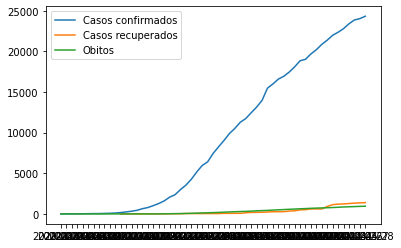

In [13]:
import matplotlib.pyplot as plt

sorted_df = df.sort_values(by=['data_relatorio'])

x = sorted_df.data_relatorio
y = sorted_df.confirmados
z = sorted_df.recuperados
m = sorted_df.obitos

plt.plot(x, y, label="Casos confirmados")
plt.plot(x, z, label="Casos recuperados")
plt.plot(x, m, label="Obitos")

plt.legend(loc="best") #show legend
plt.show()

### Sintomas do COVID-19 nos casos confirmados

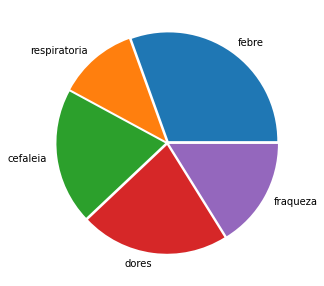

In [14]:
import matplotlib.pyplot as plt

f = df.sintoma_febre.mean()
r = df.sintoma_respiratoria.mean()
c = df.sintoma_cefaleia.mean()
d = df.sintoma_dores.mean()
fr = df.sintoma_fraqueza.mean()

x = [f, r, c, d, fr]

dataName = ['febre', 'respiratoria', 'cefaleia', 'dores', 'fraqueza']
explode = [0.02, 0.02, 0.02, 0.02, 0.02] 

plt.figure(figsize=(5,5))

plt.pie(x, explode=explode, labels = dataName) 
plt.show()

### Pessoas internadas e nos cuidados intensivos dos hospitais

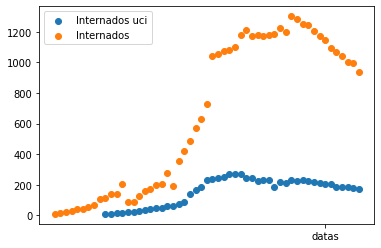

In [94]:
import matplotlib.pyplot as plt

sorted_df = df.sort_values(by=['data_relatorio'])

x = sorted_df.data_relatorio
y = sorted_df.internados_uci
z = sorted_df.internados
plt.scatter(x, y, label= "Internados uci")
plt.scatter(x, z, label= "Internados")

plt.xticks([50], ['datas'])

plt.legend(loc="best") #show legend
plt.show()

### Número de casos confirmados até à última data por idade 

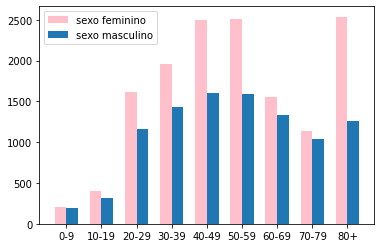

In [16]:
import matplotlib.pyplot as plt
import numpy as np

sorted_df = df.sort_values(by=['data_relatorio'])

a = sorted_df.confirmados_feminino_0_9.iat[-1]
b = sorted_df.confirmados_feminino_10_19.iat[-1]
c = sorted_df.confirmados_feminino_20_29.iat[-1]
d = sorted_df.confirmados_feminino_30_39.iat[-1]
e = sorted_df.confirmados_feminino_40_49.iat[-1]
f = sorted_df.confirmados_feminino_50_59.iat[-1]
g = sorted_df.confirmados_feminino_60_69.iat[-1]
h = sorted_df.confirmados_feminino_70_79.iat[-1]
i = sorted_df.confirmados_feminino_80_sup.iat[-1]

aa = sorted_df.confirmados_masculino_0_9.iat[-1]
bb = sorted_df.confirmados_masculino_10_19.iat[-1]
cc = sorted_df.confirmados_masculino_20_29.iat[-1]
dd = sorted_df.confirmados_masculino_30_39.iat[-1]
ee = sorted_df.confirmados_masculino_40_49.iat[-1]
ff = sorted_df.confirmados_masculino_50_59.iat[-1]
gg = sorted_df.confirmados_masculino_60_69.iat[-1]
hh = sorted_df.confirmados_masculino_70_79.iat[-1]
ii = sorted_df.confirmados_masculino_80_sup.iat[-1]

#parametros do grafico de barras
width = 5


x = [a,b,c,d,e,f,g,h,i]
y = [aa,bb,cc,dd,ee,ff,gg,hh,ii]


mulheres = [0,15,30,45,60,75,90,105,120]

homens = [5,20,35,50,65,80,95,110,125]

meio = [2.5,17.5,32.5,47.5,62.5,77.5,92.5,107.5,122.5]

plt.bar(mulheres, x, width=width, color ='pink', label='sexo feminino')
plt.bar(homens, y, width=width, label='sexo masculino')

plt.xticks(meio, ['0-9','10-19','20-29','30-39','40-49','50-59','60-69','70-79','80+'])

plt.legend(loc="best") #show legend
plt.show()
 



### Número de óbitos até à última data por idade 

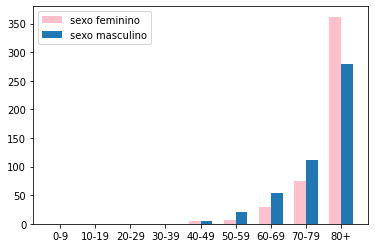

In [17]:
import matplotlib.pyplot as plt
import numpy as np

sorted_df = df.sort_values(by=['data_relatorio'])

a = sorted_df.obitos_feminino_0_9.iat[-1]
b = sorted_df.obitos_feminino_10_19.iat[-1]
c = sorted_df.obitos_feminino_20_29.iat[-1]
d = sorted_df.obitos_feminino_30_39.iat[-1]
e = sorted_df.obitos_feminino_40_49.iat[-1]
f = sorted_df.obitos_feminino_50_59.iat[-1]
g = sorted_df.obitos_feminino_60_69.iat[-1]
h = sorted_df.obitos_feminino_70_79.iat[-1]
i = sorted_df.obitos_feminino_80_sup.iat[-1]

aa = sorted_df.obitos_masculino_0_9.iat[-1]
bb = sorted_df.obitos_masculino_10_19.iat[-1]
cc = sorted_df.obitos_masculino_20_29.iat[-1]
dd = sorted_df.obitos_masculino_30_39.iat[-1]
ee = sorted_df.obitos_masculino_40_49.iat[-1]
ff = sorted_df.obitos_masculino_50_59.iat[-1]
gg = sorted_df.obitos_masculino_60_69.iat[-1]
hh = sorted_df.obitos_masculino_70_79.iat[-1]
ii = sorted_df.obitos_masculino_80_sup.iat[-1]

#parametros do grafico de barras
width = 5


x = [a,b,c,d,e,f,g,h,i]
y = [aa,bb,cc,dd,ee,ff,gg,hh,ii]


mulheres = [0,15,30,45,60,75,90,105,120]

homens = [5,20,35,50,65,80,95,110,125]

meio = [2.5,17.5,32.5,47.5,62.5,77.5,92.5,107.5,122.5]

plt.bar(mulheres, x, width=width, color ='pink', label='sexo feminino')
plt.bar(homens, y, width=width, label='sexo masculino')

plt.xticks(meio, ['0-9','10-19','20-29','30-39','40-49','50-59','60-69','70-79','80+'])

plt.legend(loc="best") #show legend
plt.show()
 


### Proporção de pessoas infetadas com a população 

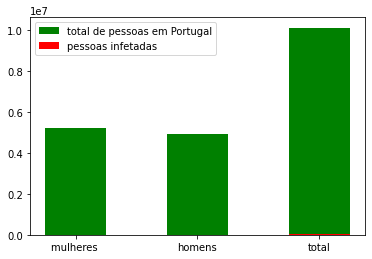

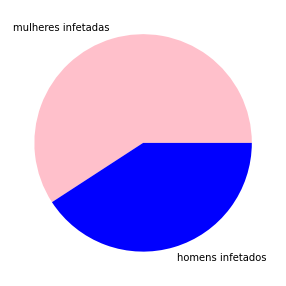

Há 14393.0 mulheres infetadas, 9929.0 homens infetados. Isto dá um total de 24322.0 pessoas infetadas em Portugal.


In [90]:
import matplotlib.pyplot as plt
import numpy as np

sorted_df = df.sort_values(by=['data_relatorio'])

a = sorted_df.confirmados_feminino_0_9.iat[-1]
b = sorted_df.confirmados_feminino_10_19.iat[-1]
c = sorted_df.confirmados_feminino_20_29.iat[-1]
d = sorted_df.confirmados_feminino_30_39.iat[-1]
e = sorted_df.confirmados_feminino_40_49.iat[-1]
f = sorted_df.confirmados_feminino_50_59.iat[-1]
g = sorted_df.confirmados_feminino_60_69.iat[-1]
h = sorted_df.confirmados_feminino_70_79.iat[-1]
i = sorted_df.confirmados_feminino_80_sup.iat[-1]

mulheresInfetadas = a+b+c+d+e+f+g+h+i

aa = sorted_df.confirmados_masculino_0_9.iat[-1]
bb = sorted_df.confirmados_masculino_10_19.iat[-1]
cc = sorted_df.confirmados_masculino_20_29.iat[-1]
dd = sorted_df.confirmados_masculino_30_39.iat[-1]
ee = sorted_df.confirmados_masculino_40_49.iat[-1]
ff = sorted_df.confirmados_masculino_50_59.iat[-1]
gg = sorted_df.confirmados_masculino_60_69.iat[-1]
hh = sorted_df.confirmados_masculino_70_79.iat[-1]
ii = sorted_df.confirmados_masculino_80_sup.iat[-1]

homensInfetados = aa+bb+cc+dd+ee+ff+gg+hh+ii 

#descobrir a proporção de mulheres infetadas e homens infetados
total = 10130284
mulheres = 5221823
homens = 4908461



totalInfetado = homensInfetados + mulheresInfetadas

#parametros do grafico de barras
width = 5


x = [mulheresInfetadas, homensInfetados, totalInfetado]
y = [mulheres, homens, total]


infetados = [0,10,20]

saudavel = [0,10,20]

plt.bar(saudavel, y, width=width, color = 'green', label='total de pessoas em Portugal')
plt.bar(infetados, x, width=width, color ='red', bottom=saudavel, label='pessoas infetadas')

plt.xticks(infetados, ['mulheres ', 'homens', 'total'])


plt.legend(loc="best") #show legend
plt.show()





#PIE

percentagemF = mulheresInfetadas/mulheres * 100
percentagemM = homensInfetados/homens * 100

oi = [mulheresInfetadas, homensInfetados]

dataName = ['mulheres infetadas', 'homens infetados']
explode = [0.02, 0.02, 0.02] 

plt.figure(figsize=(5,5))

plt.pie(oi, labels = dataName, colors = ['pink', 'blue']) 
plt.show()

print("Há " + str(mulheresInfetadas) + " mulheres infetadas, "+ str(homensInfetados)+ " homens infetados. Isto dá um total de "+ str(totalInfetado) + " pessoas infetadas em Portugal.")

# QSIS

In [19]:
#carrega os imports para comunicar o qsis

import os
import sys
from osgeo import ogr
os.environ['QT_QPA_PLATFORM'] = 'offscreen'
sys.path.insert(0,'/usr/share/qgis/python')
from qgis.core import *
QgsApplication.setPrefixPath("/usr/", True) 
from qgis.gui import *
from qgis import processing

from qgis.PyQt.QtGui import QColor, QImage
from qgis.PyQt.QtCore import QSize, QBuffer, QIODevice

qgs = QgsApplication([], False)
qgs.initQgis()
print(QgsApplication.showSettings())

Application state:
QGIS_PREFIX_PATH env var:		
Prefix:		/usr/
Plugin Path:		/usr//lib/qgis/plugins
Package Data Path:	/usr//share/qgis
Active Theme Name:	
Active Theme Path:	/usr//share/qgis/resources/themes//icons/
Default Theme Path:	:/images/themes/default/
SVG Search Paths:	/usr//share/qgis/svg/
		/root/.local/share/profiles/default/svg/
User DB Path:	/usr//share/qgis/resources/qgis.db
Auth DB Path:	/root/.local/share/profiles/default/qgis-auth.db



In [20]:
#fazer download da versão do dia 2020-04-20
import urllib.request

urllib.request.urlretrieve ("https://github.com/jgrocha/covid-pt/raw/master/covid-pt-2020-04-20.gpkg", "covid-pt-2020-04-20.gpkg")

covid_gpkg = "covid-pt-2020-04-20.gpkg"
conn = ogr.Open(covid_gpkg)
for i in conn:
    vlayer = QgsVectorLayer("{}|layername={}".format(covid_gpkg, i.GetName()), i.GetName(), "ogr")
    if not vlayer.isValid():
        print("Layer {} failed to load".format(i.GetName()))
    else:
        QgsProject.instance().addMapLayer(vlayer)
        print("Layer {} loaded".format(i.GetName()))


Layer concelho loaded
Layer distrito loaded
Layer raa_central_concelho loaded
Layer raa_central_ilha loaded
Layer raa_ocidental_concelho loaded
Layer raa_ocidental_ilha loaded
Layer raa_oriental_concelho loaded
Layer raa_oriental_ilha loaded
Layer ram_concelho loaded
Layer ram_ilha loaded
Layer layer_styles loaded
Layer confirmados_concelho loaded
Layer confirmados_distrito_ilha loaded
Layer situacao_epidemiologica loaded


#**Casos de COVID-19 em Portugal por Distrito**





In [21]:
distrito = QgsProject.instance().mapLayersByName('distrito')[0]
for c in distrito.getFeatures():
        print("Em {} há {} caso(s) confirmados".format(c["distrito"], c["confirmados_distrito_mais_recente"]))

KeyError: ignored

In [0]:
xt = distrito.extent()
# print(xt)
width  = 400
height = int(width*xt.height()/xt.width())
print("Gerar mapa com {} por {}".format(width, height))

options = QgsMapSettings()
options.setLayers([distrito])
options.setBackgroundColor(QColor(255, 255, 255))
options.setOutputSize(QSize(width, height))
options.setExtent(xt)
           
render = QgsMapRendererParallelJob(options)
render.start()
render.waitForFinished()

image = render.renderedImage()

**Mapa de Portugal por Distrito**

In [0]:
from IPython.display import Image

In [0]:
imgbuf= QBuffer()
imgbuf.open( QIODevice.ReadWrite )
image.save( imgbuf,"PNG" )
Image( imgbuf.data() )

#**Casos de COVID-19 em Portugal por Concelho**

In [0]:
concelho = QgsProject.instance().mapLayersByName('concelho')[0]
for c in concelho.getFeatures():
        print("Em {} há {} caso(s) confirmados".format(c["concelho"], c["confirmados_concelho_20/04/2020"]))

In [0]:
expr_sem_casos = QgsExpression( " \"confirmados_concelho_20/04/2020\" IS NULL " )
virgens = list(concelho.getFeatures( QgsFeatureRequest( expr_sem_casos ) ))
for c in virgens:
        print("Em {} não há pelos menos 3 casos confirmados".format(c["concelho"]))

In [0]:
xt = concelho.extent()
# print(xt)
width  = 400
height = int(width*xt.height()/xt.width())
print("Gerar mapa com {} por {}".format(width, height))

options = QgsMapSettings()
options.setLayers([concelho])
options.setBackgroundColor(QColor(255, 255, 255))
options.setOutputSize(QSize(width, height))
options.setExtent(xt)
           
render = QgsMapRendererParallelJob(options)
render.start()
render.waitForFinished()

image = render.renderedImage()

**Mapa de Portugal por Conselho**

In [0]:

from IPython.display import Image

In [0]:
imgbuf= QBuffer()
imgbuf.open( QIODevice.ReadWrite )
image.save( imgbuf,"PNG" )
Image( imgbuf.data() )

# **Turismo em Portugal**

In [0]:
import pandas as pd
dturismo = pd.read_csv("")
dturismo.head()